In [1]:
import pandas as pd
import numpy as np


In [2]:
myfile ='Fluorescein_data.xlsx'

In [5]:
fluorescein_data = pd.read_excel(myfile)

In [7]:
fluorescein_data.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
0,0.798000,0.589000,32.802000,10,Fluorescein,200.216,210.148,17.321,7.993968
1,0.550000,2.546650,35.180000,10,Fluorescein,200.216,210.148,17.321,8.949729
2,2.556500,1.656000,30.156000,10,Fluorescein,200.216,210.148,17.321,8.035938
3,2.242912,0.922337,33.855466,10,Fluorescein,200.216,210.148,17.321,8.656070
4,1.817571,3.911997,35.741068,10,Fluorescein,200.216,210.148,17.321,9.696537


In [9]:
fluorescein_data = pd.concat([
    fluorescein_data[fluorescein_data['Concentration_ppm'] == 0],
    fluorescein_data[fluorescein_data['Concentration_ppm'] != 0]
])
fluorescein_data.reset_index(drop=True, inplace=True)
fluorescein_data.head(15)

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
0,0.155000,3.394000,1.746000,0,Fluorescein,200.216,210.148,17.321,1.238061
1,1.025000,2.025000,0.255540,0,Fluorescein,200.216,210.148,17.321,0.772891
2,0.255500,3.052000,2.050000,0,Fluorescein,200.216,210.148,17.321,1.252674
3,0.557854,3.612217,2.104231,0,Fluorescein,200.216,210.148,17.321,1.467038
4,1.480377,2.136277,0.666044,0,Fluorescein,200.216,210.148,17.321,1.001367
5,0.646963,3.314748,2.131117,0,Fluorescein,200.216,210.148,17.321,1.424607
6,0.949837,4.109128,2.130509,0,Fluorescein,200.216,210.148,17.321,1.681021
7,1.649009,2.619575,0.868786,0,Fluorescein,200.216,210.148,17.321,1.201204
8,0.768641,3.535437,2.327671,0,Fluorescein,200.216,210.148,17.321,1.550615
9,1.395383,4.409602,2.473790,0,Fluorescein,200.216,210.148,17.321,1.935718


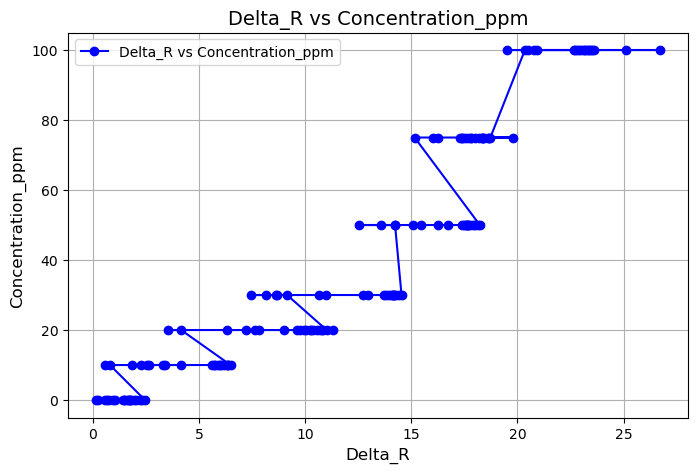

In [11]:
import matplotlib.pyplot as plt
x_column = 'Delta_R'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(fluorescein_data[x_column], fluorescein_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

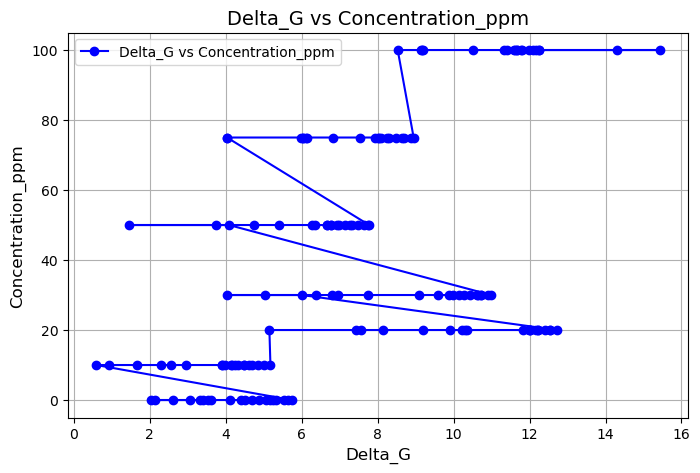

In [13]:
import matplotlib.pyplot as plt
x_column = 'Delta_G'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(fluorescein_data[x_column], fluorescein_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

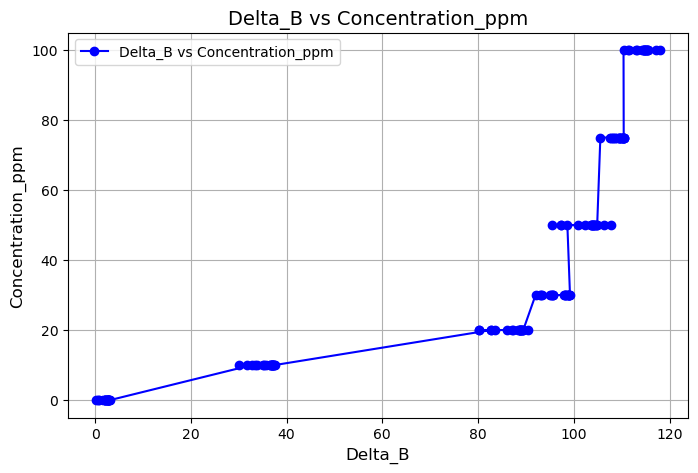

In [15]:
import matplotlib.pyplot as plt
x_column = 'Delta_B'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(fluorescein_data[x_column], fluorescein_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

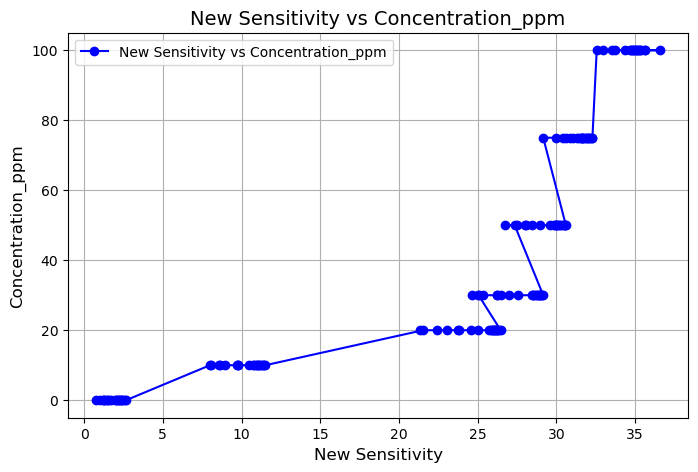

In [17]:
import matplotlib.pyplot as plt
x_column = 'New Sensitivity'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(fluorescein_data[x_column], fluorescein_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Dataset preparation
X = fluorescein_data[['Delta_R','Delta_G','Delta_B','New Sensitivity']]  # Single feature
y = fluorescein_data['Concentration_ppm']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling for specific models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function for evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    metrics = {
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "test_mae": mean_absolute_error(y_test, y_test_pred),
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred),
    }
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    metrics["cv_mean"] = np.mean(cv_scores)
    metrics["cv_std"] = np.std(cv_scores)
    
    return metrics

# Results dictionary
results = {}


In [21]:
print("Linear Regression Results:")
lr_model = LinearRegression()
results['Linear Regression'] = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print("Ridge Regression Results:")
ridge_model = Ridge(alpha=0.1)
results['Ridge Regression'] = evaluate_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

print("Lasso Regression Results:")
lasso_model = Lasso(alpha=0.1)
results['Lasso Regression'] = evaluate_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

print("Decision Tree Regressor Results:")
dtr_model = DecisionTreeRegressor(random_state=42)
results['Decision Tree'] = evaluate_model(dtr_model, X_train, y_train, X_test, y_test)

print("Random Forest Regressor Results:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
results['Random Forest'] = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

print("XGBoost Regressor Results:")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
results['XGBoost'] = evaluate_model(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)


Linear Regression Results:
Ridge Regression Results:
Lasso Regression Results:
Decision Tree Regressor Results:
Random Forest Regressor Results:
XGBoost Regressor Results:


In [23]:
# Print a summary of all models
for model, metrics in results.items():
    print(f"\n{model} Results:")
    print(f"  Train R²: {metrics['train_r2']:.3f}")
    print(f"  Test R²: {metrics['test_r2']:.3f}")
    print(f"  Train MAE: {metrics['train_mae']:.3f}")
    print(f"  Test MAE: {metrics['test_mae']:.3f}")
    print(f"  Train MSE: {metrics['train_mse']:.3f}")
    print(f"  Test MSE: {metrics['test_mse']:.3f}")
    print(f"  CV R² Mean: {metrics['cv_mean']:.3f} (±{metrics['cv_std']:.3f})")



Linear Regression Results:
  Train R²: 0.883
  Test R²: 0.930
  Train MAE: 9.397
  Test MAE: 7.590
  Train MSE: 129.271
  Test MSE: 84.326
  CV R² Mean: 0.870 (±0.023)

Ridge Regression Results:
  Train R²: 0.883
  Test R²: 0.930
  Train MAE: 9.411
  Test MAE: 7.584
  Train MSE: 129.279
  Test MSE: 84.382
  CV R² Mean: 0.870 (±0.023)

Lasso Regression Results:
  Train R²: 0.883
  Test R²: 0.930
  Train MAE: 9.483
  Test MAE: 7.566
  Train MSE: 129.487
  Test MSE: 84.485
  CV R² Mean: 0.870 (±0.024)

Decision Tree Results:
  Train R²: 1.000
  Test R²: 1.000
  Train MAE: 0.000
  Test MAE: 0.000
  Train MSE: 0.000
  Test MSE: 0.000
  CV R² Mean: 0.950 (±0.038)

Random Forest Results:
  Train R²: 0.996
  Test R²: 0.999
  Train MAE: 0.829
  Test MAE: 0.570
  Train MSE: 4.357
  Test MSE: 1.743
  CV R² Mean: 0.972 (±0.023)

XGBoost Results:
  Train R²: 1.000
  Test R²: 0.997
  Train MAE: 0.006
  Test MAE: 0.495
  Train MSE: 0.000
  Test MSE: 3.839
  CV R² Mean: 0.947 (±0.032)


In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Random Forest model with default hyperparameters
rf_model = RandomForestRegressor(n_estimators=100,   # 100 trees
                                 max_depth=None,     # No limit to tree depth
                                 min_samples_split=3, # Minimum samples to split a node
                                 min_samples_leaf=1,  # Minimum samples at a leaf node
                                 bootstrap=True,      # Use bootstrapping for sampling
                                 random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on training and test set
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Calculate R², MAE, and MSE
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)
train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)

# Print the evaluation metrics
print(f"Random Forest - Train R²: {train_r2_rf}")
print(f"Random Forest - Test R²: {test_r2_rf}")
print(f"Random Forest - Train MAE: {train_mae_rf}")
print(f"Random Forest - Test MAE: {test_mae_rf}")
print(f"Random Forest - Train MSE: {train_mse_rf}")
print(f"Random Forest - Test MSE: {test_mse_rf}")

Random Forest - Train R²: 0.9950250911004996
Random Forest - Test R²: 0.9983581401214852
Random Forest - Train MAE: 0.9265252976190477
Random Forest - Test MAE: 0.6261904761904759
Random Forest - Train MSE: 5.508559492807541
Random Forest - Test MSE: 1.9833730158730152


In [59]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Define the XGBoost model with default hyperparameters
xgboost_model = xgb.XGBRegressor(n_estimators=100,      # 100 boosting rounds (trees)
                                 max_depth=2,           # Depth of each tree
                                 learning_rate=0.3,     # Learning rate to control the weight of each tree
                                 subsample=0.8,         # Use 80% of the data to fit each tree
                                 colsample_bytree=0.8,  # Use 80% of the features to fit each tree
                                 objective='reg:squarederror',  # Regression task
                                 reg_alpha= 0.3,
                                 random_state=42)

# Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Predict on training and test set
y_pred_train_xgb = xgboost_model.predict(X_train)
y_pred_test_xgb = xgboost_model.predict(X_test)

# Calculate R², MAE, and MSE
train_r2_xgb = r2_score(y_train, y_pred_train_xgb)
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
train_mse_xgb = mean_squared_error(y_train, y_pred_train_xgb)
test_mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)

# Print the evaluation metrics
print(f"XGBoost - Train R²: {train_r2_xgb}")
print(f"XGBoost - Test R²: {test_r2_xgb}")
print(f"XGBoost - Train MAE: {train_mae_xgb}")
print(f"XGBoost - Test MAE: {test_mae_xgb}")
print(f"XGBoost - Train MSE: {train_mse_xgb}")
print(f"XGBoost - Test MSE: {test_mse_xgb}")

# Test the model with a sample input
sample_input = [[10, 12, 89, 26]]  # Replace with appropriate feature values
sample_prediction = xgboost_model.predict(sample_input)

print(f"Prediction for sample input {sample_input}: {sample_prediction[0]:.2f}")

XGBoost - Train R²: 0.9997206926345825
XGBoost - Test R²: 0.9921178817749023
XGBoost - Train MAE: 0.33229755472192274
XGBoost - Test MAE: 1.4259195543293441
XGBoost - Train MSE: 0.3092608730062584
XGBoost - Test MSE: 9.521608456397464
Prediction for sample input [[10, 12, 89, 26]]: 19.89


<H1>XGBoost is best here</H1>

In [61]:
import joblib

# Save the XGBoost model to a file
joblib.dump(xgboost_model, 'acetaldehyde_fluorescein_xgboost_model.pkl')
print("XGBoost model saved as acetaldehyde_fluorescein_xgboost_model.pkl")

XGBoost model saved as acetaldehyde_fluorescein_xgboost_model.pkl


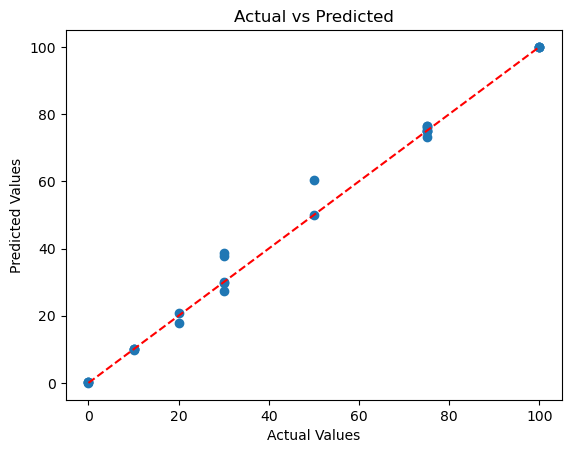

In [63]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test_xgb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
